In [1]:
'''
Sources:
https://medium.com/@sonu008/image-enhancement-contrast-stretching-using-opencv-python-6ad61f6f171c
http://scikit-image.org/docs/0.9.x/auto_examples/plot_equalize.html
https://stackoverflow.com/questions/33859531/runtimeerror-module-compiled-against-api-version-a-but-this-version-of-numpy-is
https://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html
https://github.com/bhaveshkumarraj/Subtractive-Clustering-Algorithm/blob/master/code.py
'''

'\nSources:\nhttps://medium.com/@sonu008/image-enhancement-contrast-stretching-using-opencv-python-6ad61f6f171c\nhttp://scikit-image.org/docs/0.9.x/auto_examples/plot_equalize.html\nhttps://stackoverflow.com/questions/33859531/runtimeerror-module-compiled-against-api-version-a-but-this-version-of-numpy-is\nhttps://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html\nhttps://github.com/bhaveshkumarraj/Subtractive-Clustering-Algorithm/blob/master/code.py\n'

In [2]:
# Note: Please try to adjust g and th values to get desired mask
# you can  use circle fitting also to get mask 
"""
Created on Tue Feb 20 22:09:00 2018

@author: ash
"""

'''
# from skimage.morphology import closing
import cv2
import numpy as np
import glob
from sklearn.cluster import KMeans
import cv2
# import os
## getting the mask from the rgb images
def preprocessing(img):
    # resizing using aspect ratio intact and finding the circle
    # reduce size retain aspect ratio intact
    # invert BGR 2 RGB
    RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    Ig = RGB[:, :, 2]
    [w,h] = np.shape(Ig)
    r=1200.0/Ig.shape[1]
    dim=(1200,int(Ig.shape[0]*r))
    rz = cv2.resize(Ig,dim,interpolation=cv2.INTER_AREA)
    #  convert in to float and get log trasform for contrast streching
    g = 0.2 * (np.log(1 + np.float32(rz)))
    # change into uint8
    cvuint = cv2.convertScaleAbs(g)
    # cvuint8.dtype
    ret, th = cv2.threshold(cvuint, 0, 255, cv2.THRESH_OTSU)
    ret1,th1 = cv2.threshold(Ig,0,255,cv2.THRESH_OTSU)
    # closeing operation
    # from skimage.morphology import disk
    # from skimage.morphology import erosion, dilation, opening, closing, white_tophat
    # selem = disk(30)
    # cls = opening(th, selem)
    # plot_comparison(orig_phantom, eroded, 'erosion')
    # in case using opencv
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35,35))
    cls = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
    Im = cls*rz # the mask with resize image
    # cv2.imwrite('mynew.jpg', mask)
    return (Im,th,th1,cls,g,RGB)

#path_dir = glob.glob('I:\\dataset\\diretdb\DRIONS-DB\\images\\*.jpg')
#for k in path_dir:
#print('running code....',k)
img = cv2.imread("1 seconds.jpg")
(Im,th,th1,cls,g,RGB) = preprocessing(img)
from matplotlib import pyplot as plt
# plt.imshow(cls)
# plt.show()
# cv2.imshow('asd',cls)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plot the data
titles = ['Original Image', 'log_transform','mask using logT','mask without log_T ']
images = [RGB,g,cls,th]
for i in range(0,np.size(images)):
    print(i)
    plt.subplot(2, 3, i + 1)
    plt.imshow((images[i]),'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()
'''

'\n# from skimage.morphology import closing\nimport cv2\nimport numpy as np\nimport glob\nfrom sklearn.cluster import KMeans\nimport cv2\n# import os\n## getting the mask from the rgb images\ndef preprocessing(img):\n    # resizing using aspect ratio intact and finding the circle\n    # reduce size retain aspect ratio intact\n    # invert BGR 2 RGB\n    RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)\n    Ig = RGB[:, :, 2]\n    [w,h] = np.shape(Ig)\n    r=1200.0/Ig.shape[1]\n    dim=(1200,int(Ig.shape[0]*r))\n    rz = cv2.resize(Ig,dim,interpolation=cv2.INTER_AREA)\n    #  convert in to float and get log trasform for contrast streching\n    g = 0.2 * (np.log(1 + np.float32(rz)))\n    # change into uint8\n    cvuint = cv2.convertScaleAbs(g)\n    # cvuint8.dtype\n    ret, th = cv2.threshold(cvuint, 0, 255, cv2.THRESH_OTSU)\n    ret1,th1 = cv2.threshold(Ig,0,255,cv2.THRESH_OTSU)\n    # closeing operation\n    # from skimage.morphology import disk\n    # from skimage.morphology import erosion, d

/Users/ezekieladrieldlagmay/Documents/Dynamic Individual Eye-Tracking/EnhancedAutomaticAOIBoundingBoxesEstimationAlgorithm/SamplePhotos/frame803.png


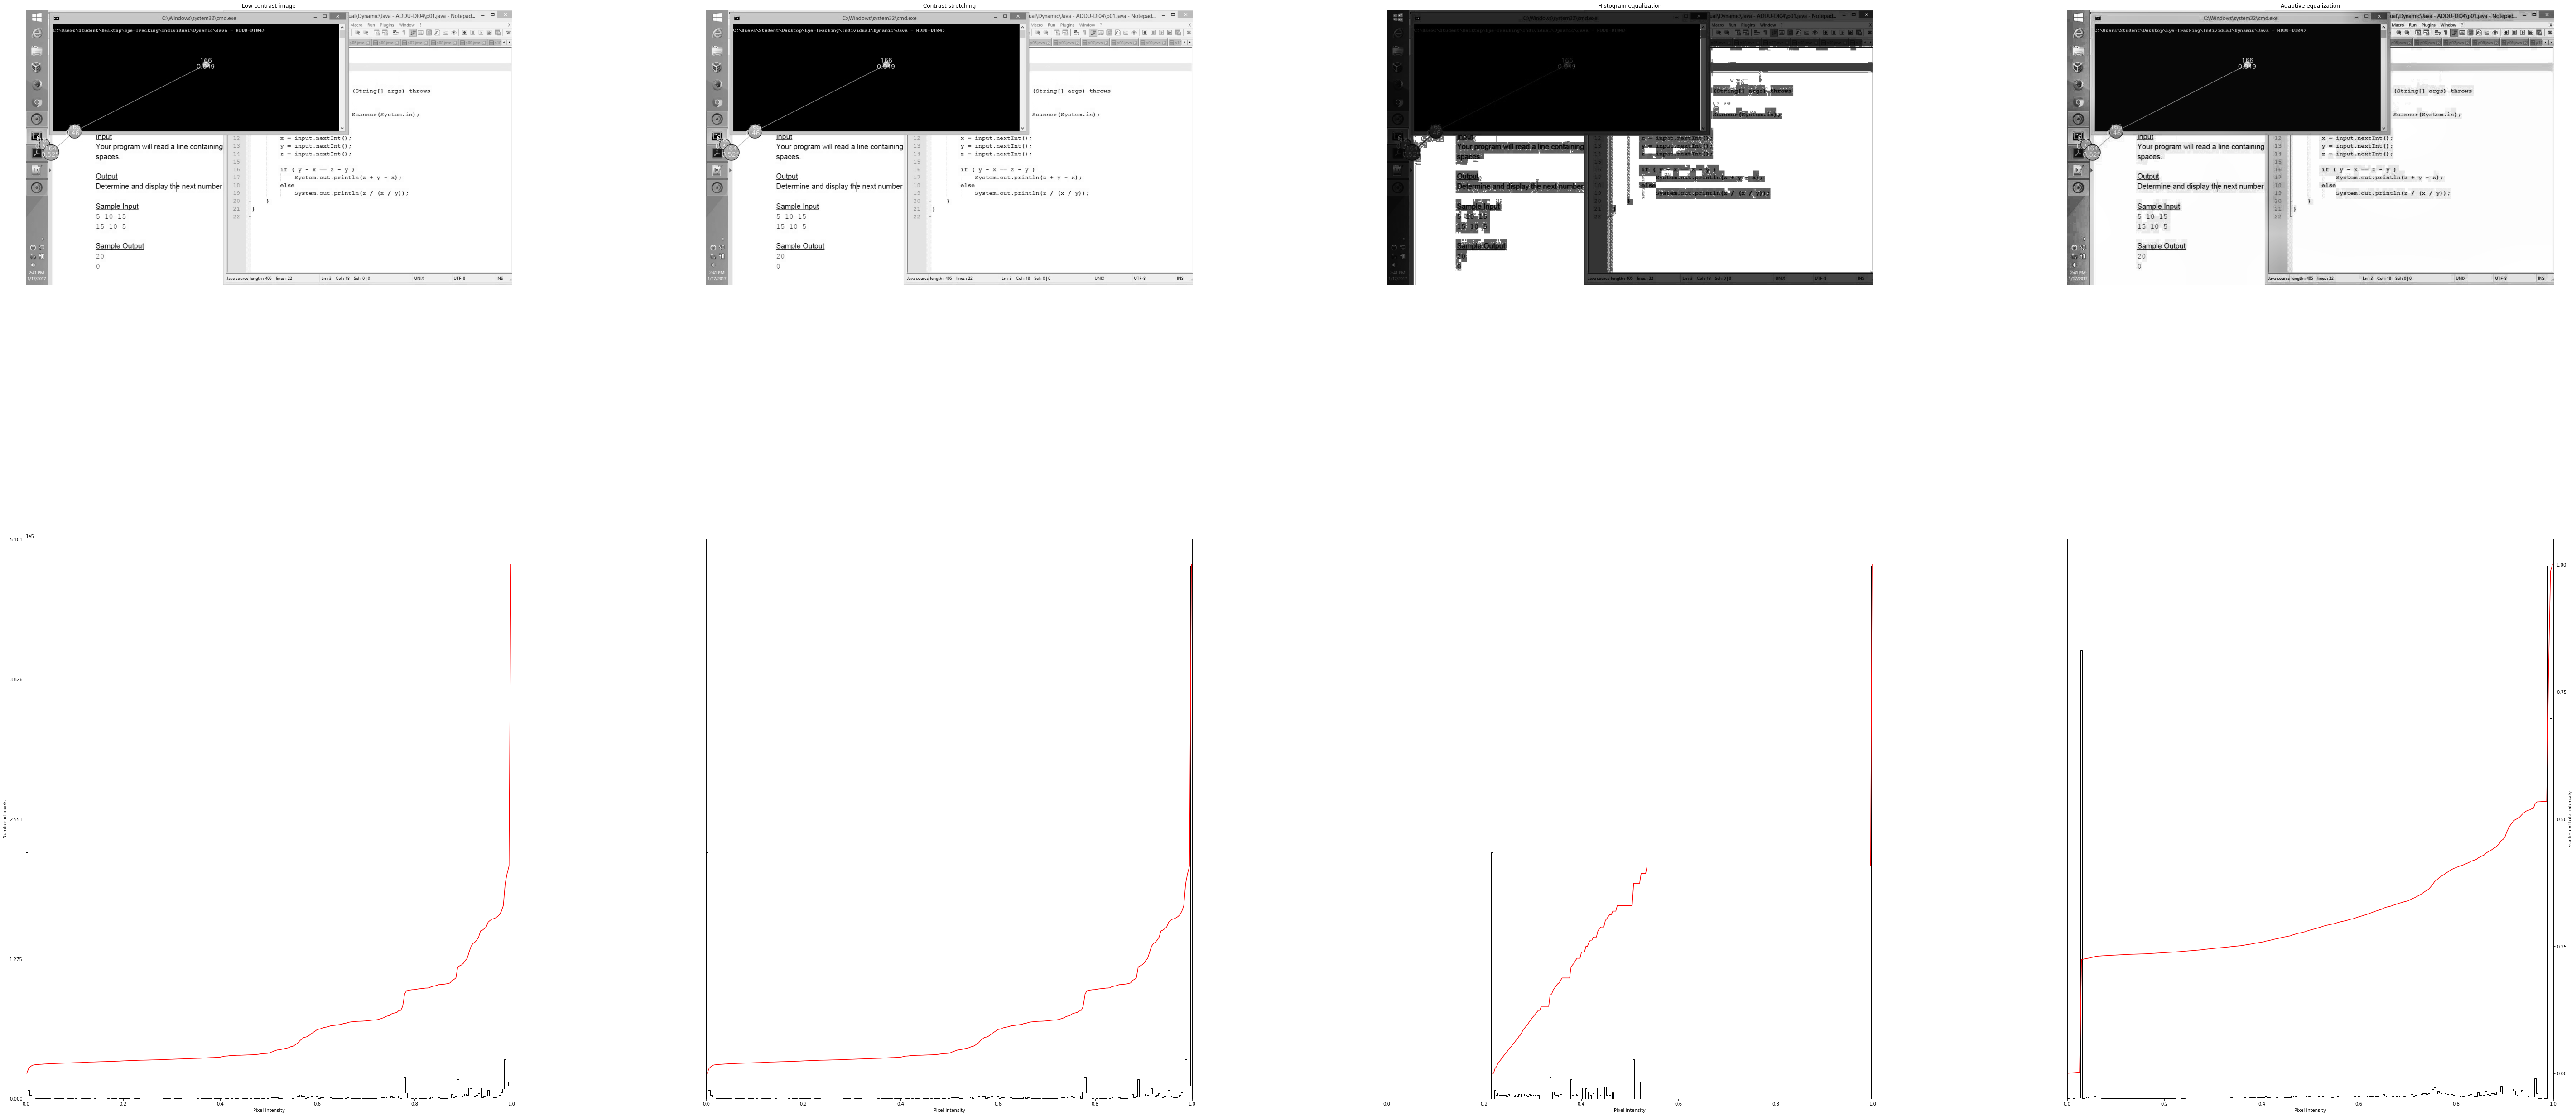

In [3]:
'''
Comments:
Automatic Tracking of AOIs
- When you frame these activities, be able to connect them
- How do they support the bigger goal
- Try to make that connection
- Automatic tracking of AOIs
- Clear: Get the most essential parts, remove unnecessary
- How to track: frame-by-frame or in intervals?
- State the goal and the big steps that are needed to achieve that goal, then drill down into the big steps.
- Start off by helping the reader appreciate the bigger goal first
- Go into finer and finer details then
- Doc Vergara / Doc Jon - How does it connect?
- Pull it up, how does it achieve and connect with the bigger goal?
- The great takeaway?
- Easy to get lost in the fine details.
- Outline first the big portions (top-level), then talk about each portion in smaller details.
- Breadth-first search approach.
- We can still trim the problem if large.
- As you read about it more...
- If you want to focus on a portion...
- If you find the initial problem too big, then we can trim it.
- As long as the problem is well-defined.
- Know what the other people had done...and their limitations.
- Slight modification to make your work different.
- The approach they used, but the drawback is that they don't handle these cases.
'''

import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
import cv2

def plot_img_and_hist(filename, img, axes, bins=256):
    """
    Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    
    cv2.imwrite(filename, img * 255)

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

#img = cv2.imread("1 seconds.jpg")
img = cv2.imread(str(input()))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Contrast stretching
p2 = np.percentile(img, 2)
p98 = np.percentile(img, 98)
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
#cv2.imwrite("contrast_stretching.jpg", img_rescale)

# Equalization
img_eq = exposure.equalize_hist(img)
#cv2.imwrite("equalization.jpg", img_eq)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
#cv2.imwrite("adaptive_equalization.jpg", img_adapteq)

# Display results
f, axes = plt.subplots(2, 4, figsize=(100, 50))

ax_img, ax_hist, ax_cdf = plot_img_and_hist("original.jpg", img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist("contrast_stretching.jpg", img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist("equalization.jpg", img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist("adaptive_equalization.jpg", img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
plt.subplots_adjust(wspace=0.4)
plt.savefig("partial_contrast_stretching.jpg")
plt.show()

In [4]:
def getPotentials(img):
    result = []
    for i in range(0, len(img)):
        subresult = []
        for j in range(0, len(img[i])):
            Xn = img[i, j]
            potential = 0
            for m in range(0, i):
                for n in range(0, j):
                    Xi = img[m, n]
                    potential = potential + np.exp(((-4 * Xn) - (Xi ** 2)) / 100)

#img_rescale_potentials = getPotentials(img_rescale)
